In [157]:
import numpy as np 
import matplotlib.pyplot as plt 

## activation functions 

In [158]:
def relu(Z):
    return np.maximum(Z, 0)

def relu_prime(Z):
    return (Z>0)#.astype(Z.dtype)

def sigmoid(Z):
    return 1/(1+np.power(np.e, -Z))

def sigmoid_prime(Z):
    a = sigmoid(Z)
    return a * (1-a)

def leaky_relu(Z, alpha=0.01):
    return np.where(Z > 0, Z, Z * alpha)

def leaky_relu_prime(Z, alpha=0.01):
    dz = np.ones_like(Z)
    dz[Z < 0] = alpha
    return dz

def tanh(Z):
  return np.tanh(Z)

def tanh_prime(Z):
  return 1-(tanh(Z)**2)

def get_activation_function(name):
    if name=='relu':
        return relu, relu_prime
    elif name=='sigmoid':
        return sigmoid, sigmoid_prime
    elif name=='leaky_relu':
        return leaky_relu, leaky_relu_prime
    elif name=='tanh':
        return tanh, tanh_prime 
    else:
        raise ValueError('Only "relu", "leaky_relu", "tanh" and "sigmoid" are supported')
    
    """ 
        This function returns function and its derivative corresponding to an activation name
        possible values are: 'relu', 'leaky_relu', 'tanh' or 'sigmoid' activation

    """
    


## loss functions 

In [460]:
def l2_loss(y, a):
    return np.mean( (y-a)**2 )/2

def d_l2_loss(y, a):
    return ( -(y-a) )

def_noise = 10e-6

def cross_entropy(y, a, noise = def_noise):
    if y.shape == a.shape:
        y_in = y.reshape(-1)
        a_in = a.reshape(-1)
        n_s = len(y_in )

        return (-np.dot( y_in, np.log(a_in + noise  ).T )/n_s - 
                np.dot((1-y_in),np.log( (1-a_in) + noise  ).T )  )/n_s #.reshape(y)  
    else:
        print('The shape of target and predicted arrays do not match. ')
        print(y.shape)
        print(a.shape)
        
def d_cross_entropy(y,a, noise = def_noise):
    return ( -y/(a + noise) + (1-y)/(1-a + noise)  )

def get_loss_function(name):
    if name=='l2':
        return l2_loss, d_l2_loss
    elif name=='CE':
        return cross_entropy, d_cross_entropy
    
    else:
        raise ValueError('Only "CE", "l2", are supported for loss function')
    
    """ 
        This function returns function and its derivative corresponding to an loss name
        possible values are: 'CE', 'l2'. 
    """


## random network generator 

In [447]:
def initialize(n_l_1, n_l, seed=0):

  """Initializes random weights and bias for a layer l

    Arguments
    ---------
    n_l_1:
      Number of neurons in previous layer (l-1)
    n_l: 
      Number of neurons in current layer (l)
"""

  np.random.seed(seed)

  wl = np.random.uniform(-1,1,size=(n_l, n_l_1)) 
  bl = np.random.uniform(-1,1,size=(n_l, 1))
  Vdw = np.zeros((n_l, n_l_1))
  Vdb = np.zeros((n_l,1))
  Vdw2 = np.zeros((n_l, n_l_1))
  Vdb2 = np.zeros((n_l,1))

  return {'wl': wl, 'bl': bl, 'Vdw': Vdw, 'Vdb': Vdb,'Vdw2': Vdw2, 'Vdb2': Vdb2}

## Dense class 

In [448]:
class Dense():
    
  """Returns a dense layer with randomly initialized weights and bias

    Arguments:

    input_dim: int
      Number of neurons in previous layer.
    units: int
      Number of neurons in the layer.
    activation: str
      Activation function to use. 'relu', 'leaky_relu', 'tanh' or 'sigmoid'
"""

  def __init__(self, input_dim, units, activation, seed=0):

    params = initialize(input_dim, units, random_state)

    self.units = units
    self.W = params['wl']
    self.b = params['bl']
    self.activation = activation
    self.activation_func, self.d_activation = get_activation_function(activation)
    self.Z = None
    self.A = None
    self.dz = None
    self.da = None
    self.dw = None
    self.db = None
    self.Vdw = params['Vdw']
    self.Vdb = params['Vdb']
    self.Vdw2 = params['Vdw2']
    self.Vdb2 = params['Vdb2']

## Network class 

In [509]:
class NN():
    def __init__(self,num_nodes_in_layers_list,activation_func_list,loss_func,learning_rate=0.01,number_of_iter = 1000,l2_reguarization_list = [0],drop_out = False,drop_out_prob = [0],batch_size=None,number_of_epochs=None,optimization_method = 'GD',momentum_constant = 0.9 ,rms_prop_constant=0.99,random_state = 42,graphic=False):

        self.num_node_list = num_nodes_in_layers_list
        self.act_func_list = activation_func_list
        self.loss_func,self.d_loss = get_loss_function(loss_func)
        self.eta = learning_rate 
        self.iter = number_of_iter
        self.loss_list=np.zeros(number_of_iter)
        self.drop_out = drop_out 
        self.model = []
        
        self.p = np.zeros(len(self.act_func_list)-1)
        self.p[:len(self.act_func_list)-1] = drop_out_prob[:len(self.act_func_list)-1]
        self.p = 1 - self.p  

        self.batch_size = batch_size 
        self.epoch = number_of_epochs

        self.method = optimization_method 

        self. beta = momentum_constant 
        self.gamma = rms_prop_constant

        self.trained=False 
        


        if len(l2_reguarization_list)<len(activation_func_list): 
            self.l2_lambda = [l2_reguarization_list[0]]*len(activation_func_list)
        else :
            self.l2_lambda = l2_reguarization_list[:len(activation_func_list)]
        #self.w_hist=[]
        #self.dw_hist=[]

        if len(self.num_node_list) == len(self.act_func_list)+1:
            for i in range(len(self.num_node_list)-1):
                self.model.append(Dense(input_dim = self.num_node_list[i], units=self.num_node_list[i+1], activation = self.act_func_list[i], seed=random_state))


        else:
            print(f'not enough activation functions for the given number of layes we will use the first layer activation fot the entire network')
            for i in range(len(self.num_node_list)-1):
                self.model.append(Dense(input_dim = self.num_node_list[i], units=self.num_node_list[i+1], activation = self.act_func_list[0], seed=random_state))

        if graphic:
            self.visualize()
        
        #self.w_hist.append([self.model[i].W.copy() for i in range(len(self.num_node_list)-1)])
    def forward_prop(self,X):
        i=0
        X_l_1 = X.copy()
        self.model[i].Z = np.dot(self.model[i].W , X_l_1) + self.model[i].b
        self.model[i].A = self.model[i].activation_func(self.model[i].Z)


        for i in range(1,len(self.model)):
            X_l_1 = self.model[i-1].A
            self.model[i].Z = np.dot(self.model[i].W , X_l_1) + self.model[i].b
            self.model[i].A = self.model[i].activation_func(self.model[i].Z)
            
    def back_prop(self ,X, y):
        #dw_list_list=[]
        i = len(self.model)-1
  
        self.model[i].da = self.d_loss(y, self.model[i].A)
        self.model[i].dz = self.model[i].da * self.model[i].d_activation(self.model[i].Z) 
        #print(f'in calculation of dz we have: d_activation(z) = \n {self.model[i].d_activation(self.model[i].Z) },\n Z = {self.model[i].Z}\n')


        self.model[i].dw = np.dot(self.model[i].dz, self.model[i-1].A.T)/self.m
        self.model[i].db = np.sum(self.model[i].dz, axis=1,keepdims=True)/self.m

        #dw_list_list.append(self.model[i].dw.copy())
        
        #print(f'da = {self.model[i].da}\n , dz = {self.model[i].dz}\n , dw = {self.model[i].dw}\n, db = {self.model[i].db}\n')
        for i in range(len(self.model)-2,0,-1):
            self.model[i].dz = np.dot( self.model[i+1].W.T, self.model[i+1].dz ) * self.model[i].d_activation(self.model[i].Z)
            self.model[i].dw = np.dot(self.model[i].dz, self.model[i-1].A.T)/self.m
            self.model[i].db = np.sum(self.model[i].dz, axis=1, keepdims = True)/self.m 
            #dw_list_list.append(self.model[i].dw.copy())
            #print(f'dz = {self.model[i].dz}\n , dw = {self.model[i].dw}\n, db = {self.model[i].db}\n')

        i=0
        self.model[i].dz = np.dot(self.model[i+1].W.T, self.model[i+1].dz ) * self.model[i].d_activation(self.model[i].Z)
        self.model[i].dw = np.dot(self.model[i].dz,X.T)/self.m
        self.model[i].db = np.sum(self.model[i].dz, axis=1, keepdims = True)/self.m  
        #print(f'dz = {self.model[i].dz}\n , dw = {self.model[i].dw}\n, db = {self.model[i].db}\n')
        #dw_list_list.append(self.model[i].dw.copy())
        #self.dw_hist.append(dw_list_list)

    def update_weights(self):
        for i in range(len(self.model)):
            self.model[i].W -= self.eta*self.model[i].dw + self.l2_lambda[i]*self.model[i].W/self.m
            self.model[i].b -= self.eta*self.model[i].db 
    
    
    ################## drop out ######################
    def forward_prop_drop(self,X):
        dropped_neurons = []
        i=0
        X_l_1 = X.copy()
        self.model[i].Z = np.dot(self.model[i].W , X_l_1) + self.model[i].b
        self.model[i].A = self.model[i].activation_func(self.model[i].Z)

        d = np.random.rand(*self.model[i].A.shape) < self.p[i]
        dropped_neurons.append(d)
        self.model[i].A *= d
        self.model[i].A /= self.p[i]


        
        
        for i in range(1,len(self.model)):
            X_l_1 = self.model[i-1].A
            self.model[i].Z = np.dot(self.model[i].W , X_l_1) + self.model[i].b
            self.model[i].A = self.model[i].activation_func(self.model[i].Z)
            if i!=len(self.model)-1:
                d = np.random.rand(*self.model[i].A.shape) < self.p[i]
                dropped_neurons.append(d)
                self.model[i].A *= d
                self.model[i].A /= self.p[i]

        return dropped_neurons 
    
    def back_prop_drop(self,X,y,dropped_neurons):
        #dw_list_list=[]
        i = len(self.model)-1
  
        self.model[i].da = self.d_loss(y, self.model[i].A)
        self.model[i].dz = self.model[i].da * self.model[i].d_activation(self.model[i].Z) 
        #print(f'in calculation of dz we have: d_activation(z) = \n {self.model[i].d_activation(self.model[i].Z) },\n Z = {self.model[i].Z}\n')


        self.model[i].dw = np.dot(self.model[i].dz, self.model[i-1].A.T)/self.m
        self.model[i].db = np.sum(self.model[i].dz, axis=1,keepdims=True)/self.m

        #dw_list_list.append(self.model[i].dw.copy())
        
        #print(f'da = {self.model[i].da}\n , dz = {self.model[i].dz}\n , dw = {self.model[i].dw}\n, db = {self.model[i].db}\n')
        for i in range(len(self.model)-2,0,-1):
            self.model[i].da = np.dot( self.model[i+1].W.T, self.model[i+1].dz )

            self.model[i].da *= dropped_neurons[i]
            self.model[i].da /= self.p[i]

            self.model[i].dz = self.model[i].da * self.model[i].d_activation(self.model[i].Z)
            self.model[i].dw = np.dot(self.model[i].dz, self.model[i-1].A.T)/self.m
            self.model[i].db = np.sum(self.model[i].dz, axis=1, keepdims = True)/self.m 
            #dw_list_list.append(self.model[i].dw.copy())
            #print(f'dz = {self.model[i].dz}\n , dw = {self.model[i].dw}\n, db = {self.model[i].db}\n')

        i=0
        self.model[i].da = np.dot( self.model[i+1].W.T, self.model[i+1].dz )

        self.model[i].da *= dropped_neurons[i]
        self.model[i].da /= self.p[i]
        
        self.model[i].dz = self.model[i].da * self.model[i].d_activation(self.model[i].Z)
        self.model[i].dw = np.dot(self.model[i].dz,X.T)/self.m
        self.model[i].db = np.sum(self.model[i].dz, axis=1, keepdims = True)/self.m  
        #print(f'dz = {self.model[i].dz}\n , dw = {self.model[i].dw}\n, db = {self.model[i].db}\n')
        #dw_list_list.append(self.model[i].dw.copy())
        #self.dw_hist.append(dw_list_list)



   
    def update_weights_momentum(self):
        for i in range(len(self.model)):
            self.model[i].Vdw = self.beta*self.model[i].Vdw + (1-self.beta)*self.model[i].dw
            self.model[i].Vdb = self.beta*self.model[i].Vdb + (1-self.beta)*self.model[i].db
            self.model[i].W -= self.eta*self.model[i].Vdw
            self.model[i].b -= self.eta*self.model[i].Vdb

    def update_weights_rms(self):
        eps=1e-6
        for i in range(len(self.model)):
            self.model[i].Vdw = self.gamma*self.model[i].Vdw + (1-self.gamma)*(self.model[i].dw**2)
            self.model[i].Vdb = self.gamma*self.model[i].Vdb + (1-self.gamma)*(self.model[i].db**2)
            self.model[i].W -= self.eta*self.model[i].dw/np.sqrt(self.model[i].Vdw+eps)
            self.model[i].b -= self.eta*self.model[i].db/np.sqrt(self.model[i].Vdb+eps)

    def update_weights_adams(self):
        eps=1e-6
        for i in range(len(self.model)):
            
            self.model[i].Vdw = self.beta*self.model[i].Vdw + (1-self.beta)*self.model[i].dw
            self.model[i].Vdb = self.beta*self.model[i].Vdb + (1-self.beta)*self.model[i].db

            self.model[i].Vdw2 = self.gamma*self.model[i].Vdw2 + (1-self.gamma)*(self.model[i].dw**2)
            self.model[i].Vdb2 = self.gamma*self.model[i].Vdb2 + (1-self.gamma)*(self.model[i].db**2)
            
            self.model[i].W -= self.eta*self.model[i].Vdw/np.sqrt(self.model[i].Vdw2+eps)
            self.model[i].b -= self.eta*self.model[i].Vdb/np.sqrt(self.model[i].Vdb2+eps) 
    


    
    
    
   ################# choose between differnt optimization methods. the default method is gradient descent ############# 
    def fit(self,X,y):
        self.m = X.shape[1]
        self.trained=True
        if self.method == 'GD':
            if not (self.drop_out):
                for i in range(self.iter):
                    #print(i,'\n')
                    self.forward_prop(X)
                    self.back_prop(X,y)
                    self.update_weights()
                    self.loss_list[i]=self.loss_func(y,self.model[-1].A)
                    #self.w_hist.append([self.model[i].W.copy() for i in range(len(self.num_node_list)-1)])
        
            if self.drop_out : 
                for i in range(self.iter):
                    #print(i,'\n')
                    dropped_neurons=self.forward_prop_drop(X)
                    self.back_prop_drop(X,y,dropped_neurons)
                    self.update_weights()
                    self.loss_list[i]=self.loss_func(y,self.model[-1].A)
                    #self.w_hist.append([self.model[i].W.copy() for i in range(len(self.num_node_list)-1)])

        elif self.method == 'MBGD':
            self.loss_list=np.zeros(int(self.m/self.batch_size)*self.epoch)
            counter=0
            ns=self.m 
            self.m = self.batch_size


            if not (self.drop_out):
                for i in range(self.epoch):
                    p=np.random.permutation(ns)
                    X_p = X[:,p]
                    y_p = y[:,p]  
                    for j in range(int(ns/self.batch_size)):
                        X_batch=X_p[:,j*self.batch_size:min(ns,(self.batch_size)*(j+1))] 
                        y_batch=y_p[:,j*self.batch_size:min(ns,(self.batch_size)*(j+1))]
                        
                      
                        self.forward_prop(X_batch)
                        self.back_prop(X_batch,y_batch)
                        self.update_weights()
                        self.loss_list[counter]=self.loss_func(y_batch,self.model[-1].A)
                        counter+=1

            if self.drop_out : 
                for i in range(self.epoch):
                    p=np.random.permutation(ns)
                    X_p = X[:,p]
                    y_p = y[:,p]  
                    for j in range(int(ns/self.batch_size)):
                        X_batch=X_p[:,j*self.batch_size:min(ns,(self.batch_size)*(j+1))] 
                        y_batch=y_p[:,j*self.batch_size:min(ns,(self.batch_size)*(j+1))]

                        dropped_neurons=self.forward_prop_drop(X_batch)
                        self.back_prop_drop(X_batch,y_batch,dropped_neurons)
                        self.update_weights()
                        self.loss_list[counter]=self.loss_func(y_batch,self.model[-1].A)
                        counter+=1
                    #self.w_hist.append([self.model[i].W.copy() for i in range(len(self.num_node_list)-1)])

        
        
        
        elif self.method == 'momentumSGD':
            self.loss_list=np.zeros(int(self.m/self.batch_size)*self.epoch)
            counter=0
            ns=self.m 
            self.m = self.batch_size


            if not (self.drop_out):
                for i in range(self.epoch):
                    p=np.random.permutation(ns)
                    X_p = X[:,p]
                    y_p = y[:,p]  
                    for j in range(int(ns/self.batch_size)):
                        X_batch=X_p[:,j*self.batch_size:min(ns,(self.batch_size)*(j+1))] 
                        y_batch=y_p[:,j*self.batch_size:min(ns,(self.batch_size)*(j+1))]
                        
                      
                        self.forward_prop(X_batch)
                        self.back_prop(X_batch,y_batch)
                        self.update_weights_momentum()
                        self.loss_list[counter]=self.loss_func(y_batch,self.model[-1].A)
                        counter+=1
                        
                    #self.w_hist.append([self.model[i].W.copy() for i in range(len(self.num_node_list)-1)])
        
            if self.drop_out : 
                for i in range(self.epoch):
                    p=np.random.permutation(ns)
                    X_p = X[:,p]
                    y_p = y[:,p]  
                    for j in range(int(ns/self.batch_size)):
                        X_batch=X_p[:,j*self.batch_size:min(ns,(self.batch_size)*(j+1))] 
                        y_batch=y_p[:,j*self.batch_size:min(ns,(self.batch_size)*(j+1))]

                        dropped_neurons=self.forward_prop_drop(X_batch)
                        self.back_prop_drop(X_batch,y_batch,dropped_neurons)
                        self.update_weights_momentum()
                        self.loss_list[counter]=self.loss_func(y_batch,self.model[-1].A)
                        counter+=1
                    #self.w_hist.append([self.model[i].W.copy() for i in range(len(self.num_node_list)-1)])


        elif self.method == 'rmsSGD':
            self.loss_list=np.zeros(int(self.m/self.batch_size)*self.epoch)
            counter=0
            ns=self.m 
            self.m = self.batch_size


            if not (self.drop_out):
                for i in range(self.epoch):
                    p=np.random.permutation(ns)
                    X_p = X[:,p]
                    y_p = y[:,p]  
                    for j in range(int(ns/self.batch_size)):
                        X_batch=X_p[:,j*self.batch_size:min(ns,(self.batch_size)*(j+1))] 
                        y_batch=y_p[:,j*self.batch_size:min(ns,(self.batch_size)*(j+1))]
                        
                      
                        self.forward_prop(X_batch)
                        self.back_prop(X_batch,y_batch)
                        self.update_weights_rms()
                        self.loss_list[counter]=self.loss_func(y_batch,self.model[-1].A)
                        counter+=1
                        
                    #self.w_hist.append([self.model[i].W.copy() for i in range(len(self.num_node_list)-1)])
        
            if self.drop_out : 
                for i in range(self.epoch):
                    p=np.random.permutation(ns)
                    X_p = X[:,p]
                    y_p = y[:,p]  
                    for j in range(int(ns/self.batch_size)):
                        X_batch=X_p[:,j*self.batch_size:min(ns,(self.batch_size)*(j+1))] 
                        y_batch=y_p[:,j*self.batch_size:min(ns,(self.batch_size)*(j+1))]

                        dropped_neurons=self.forward_prop_drop(X_batch)
                        self.back_prop_drop(X_batch,y_batch,dropped_neurons)
                        self.update_weights_rms()
                        self.loss_list[counter]=self.loss_func(y_batch,self.model[-1].A)
                        counter+=1
                    #self.w_hist.append([self.model[i].W.copy() for i in range(len(self.num_node_list)-1)])
        
        elif self.method == 'adams':
            self.loss_list=np.zeros(int(self.m/self.batch_size)*self.epoch)
            counter=0
            ns=self.m 
            self.m = self.batch_size


            if not (self.drop_out):
                for i in range(self.epoch):
                    p=np.random.permutation(ns)
                    X_p = X[:,p]
                    y_p = y[:,p]  
                    for j in range(int(ns/self.batch_size)):
                        X_batch=X_p[:,j*self.batch_size:min(ns,(self.batch_size)*(j+1))] 
                        y_batch=y_p[:,j*self.batch_size:min(ns,(self.batch_size)*(j+1))]
                        
                      
                        self.forward_prop(X_batch)
                        self.back_prop(X_batch,y_batch)
                        self.update_weights_adams()
                        self.loss_list[counter]=self.loss_func(y_batch,self.model[-1].A)
                        counter+=1
                        
                    #self.w_hist.append([self.model[i].W.copy() for i in range(len(self.num_node_list)-1)])
        
            if self.drop_out : 
                for i in range(self.epoch):
                    p=np.random.permutation(ns)
                    X_p = X[:,p]
                    y_p = y[:,p]  
                    for j in range(int(ns/self.batch_size)):
                        X_batch=X_p[:,j*self.batch_size:min(ns,(self.batch_size)*(j+1))] 
                        y_batch=y_p[:,j*self.batch_size:min(ns,(self.batch_size)*(j+1))]

                        dropped_neurons=self.forward_prop_drop(X_batch)
                        self.back_prop_drop(X_batch,y_batch,dropped_neurons)
                        self.update_weights_adams()
                        self.loss_list[counter]=self.loss_func(y_batch,self.model[-1].A)
                        counter+=1
                        #self.w_hist.append([self.model[i].W.copy() for i in range(len(self.num_node_list)-1)]) 
        
        else:
            raise ValueError('Only "GD", "MBGD", "momentumSGD", "rmsSGD" and "adams" are supported')
            
    
    def predict(self,X):
        self.y_predict = []
        if sef.trained:
            self.forward_prop(X)
            self.y_predic= self.model[-1].A
        else : 
            "Not trained yet"

    
    def visualize(self):
        plt.figure(figsize=(len(self.num_node_list)*1.8,max(self.num_node_list)))
        x0=2
        offset=0
        dic={}
        layers_name = ['features']+self.act_func_list
        for i,item in enumerate(self.num_node_list):

            dic['layer'+str(i)]=np.linspace(-(item-1)/2,(item-1)/2,item)
            plt.plot([x0+offset]*item,dic['layer'+str(i)],'o',ms=9)
            plt.text(x=x0+offset,y=dic['layer'+str(i)][0]-0.3,s=layers_name[i])
            offset+=.5
            

        
        offset=.5
        for j in range(0,len(dic)-1):
            #print(j)
            x=x0+j*offset
            for item in dic['layer'+str(j)]:
                for item2 in dic['layer'+str(j+1)]:
                    plt.plot([x,x+offset],[item,item2],'tan')

        ax = plt.gca()
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        plt.show()


## Results 

In [462]:
np.random.seed(42)
X_train = np.random.uniform(-1, 1, size = [3, 10000])
y_train = X_train[0]**2+6*X_train[1] - 3
y_train = (y_train>.5).astype(int).reshape(1,-1)

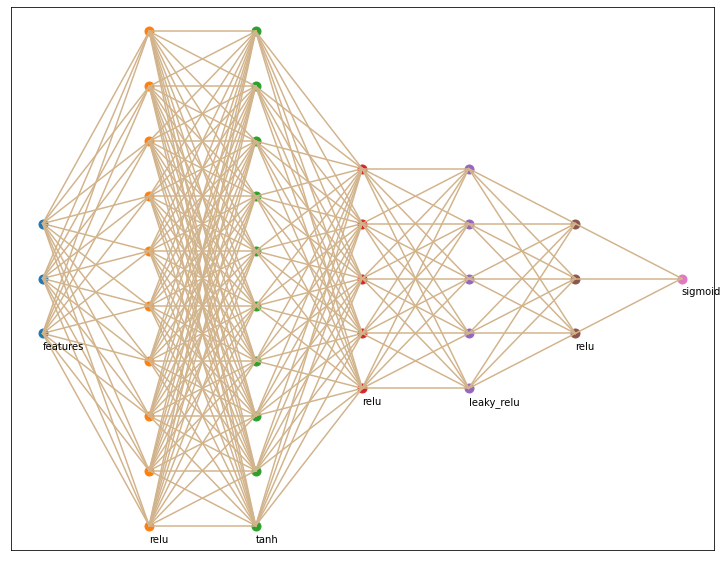

In [507]:
 random_state = 30

n_l = [X_train.shape[0],10,10,5,5,3,y_train.shape[0]]
act_func = ['relu','tanh','relu','leaky_relu','relu','sigmoid']

nn = NN(n_l,act_func,loss_func='l2',number_of_iter=1000,learning_rate=0.5,random_state=random_state,l2_reguarization_list=[0.01],graphic=True)


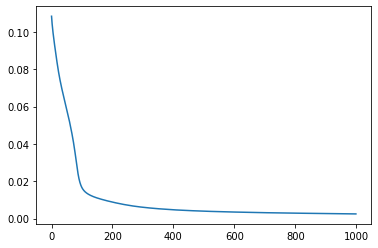

In [469]:
nn.fit(X_train,y_train)
plt.plot(nn.loss_list)

## with dropout 

In [470]:
%%time 
nn = NN(n_l,act_func,loss_func='l2',number_of_iter=1000,learning_rate=0.5,random_state=random_state,l2_reguarization_list=[0.01],drop_out=True,drop_out_prob=[0.5,0.1,0.1,0.1])
nn.fit(X_train,y_train)

Wall time: 17.1 s


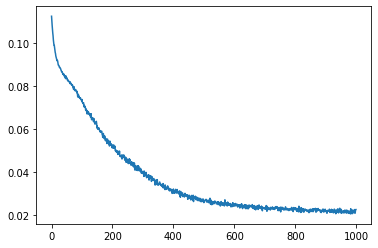

In [471]:
plt.plot(nn.loss_list)

## with minibatch 

In [472]:
%%time
nn = NN(n_l,act_func,'l2',number_of_iter=1000,learning_rate=0.2,random_state=random_state,l2_reguarization_list=[0.01],drop_out=False,drop_out_prob=[0.5,0.1,0.1,0.1],optimization_method='MBGD',batch_size=1000,number_of_epochs=1000)
nn.fit(X_train,y_train)

Wall time: 18.8 s


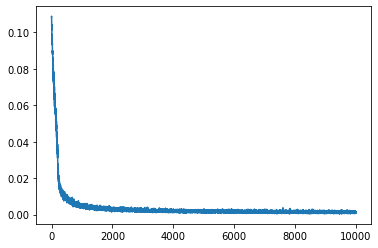

In [473]:
plt.plot(nn.loss_list)

## with minibatch and dropout 

In [474]:
%%time
nn = NN(n_l,act_func,'l2',number_of_iter=1000,learning_rate=0.2,random_state=random_state,l2_reguarization_list=[0.01],drop_out=True,drop_out_prob=[0.5,0.1,0.1,0.1],optimization_method='MBGD',batch_size=1000,number_of_epochs=1000)
nn.fit(X_train,y_train)

Wall time: 24.8 s


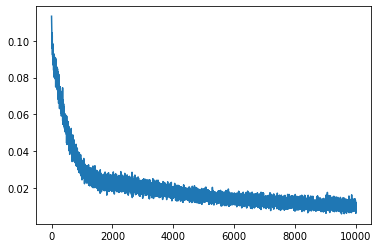

In [475]:
plt.plot(nn.loss_list)

## gradient descent with momentum + dropout 

In [476]:
%%time
nn = NN(n_l,act_func,'l2',number_of_iter=1000,learning_rate=0.4,random_state=random_state,l2_reguarization_list=[0.01],drop_out=True,drop_out_prob=[0.5,0.1,0.1,0.1],optimization_method='momentumSGD',momentum_constant=0.9,batch_size=1000,number_of_epochs=2000)
nn.fit(X_train,y_train)

Wall time: 1min 1s


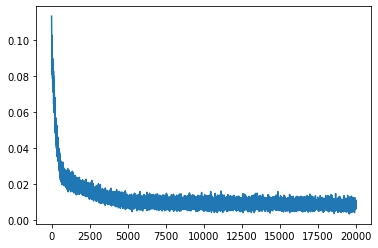

In [477]:
plt.plot(nn.loss_list)

## with rms prop 

In [478]:
%%time
nn = NN(n_l,act_func,'l2',number_of_iter=1000,learning_rate=0.6,random_state=random_state,l2_reguarization_list=[0.01],drop_out=True,drop_out_prob=[0.5,0.1,0.1,0.1],optimization_method='rmsSGD',rms_prop_constant=0.99,batch_size=1000,number_of_epochs=100)
nn.fit(X_train,y_train)

Wall time: 3.5 s


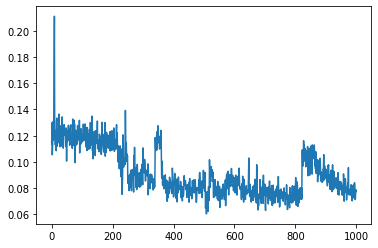

In [479]:
plt.plot(nn.loss_list)

## with adams 

In [483]:
%%time
nn = NN(n_l,act_func,'l2',number_of_iter=1000,learning_rate=0.6,random_state=random_state,l2_reguarization_list=[0.01],drop_out=True,drop_out_prob=[0.5,0.1,0.1,0.1],optimization_method='adams',momentum_constant=.9,rms_prop_constant=0.99,batch_size=500,number_of_epochs=500)
nn.fit(X_train,y_train)

Wall time: 12.7 s


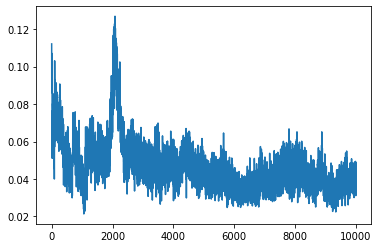

In [484]:
plt.plot(nn.loss_list)

## visualize the network 

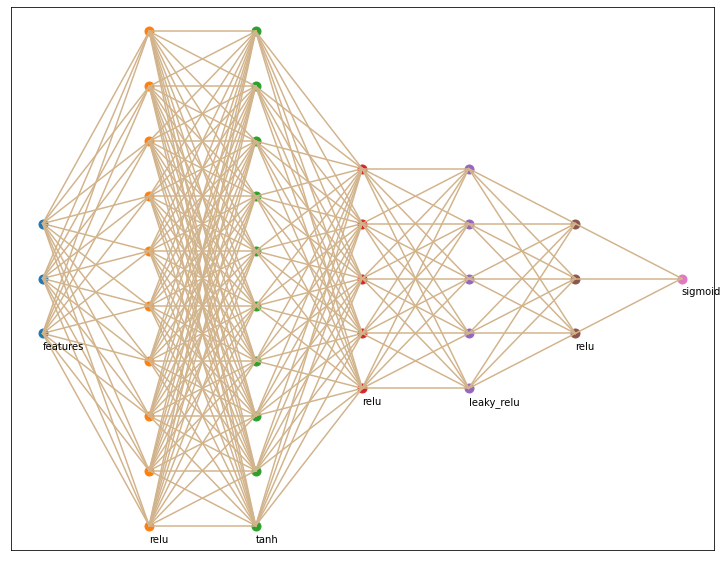

In [508]:
nn.visualize()

## real world data 

In [510]:
import requests, io
url = 'https://raw.githubusercontent.com/sraeisi/Machine_Learning_Physics_Winter20/master/Lec1/particle_mini.npz'
s=requests.get(url, stream=True).content
data=np.load(io.BytesIO(s) )

In [513]:
X, Y = data['X'], data['Y']
# The labels are 1 or 2. So we need to turn them into 0 and  1. 
Y = (Y>1.5).astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, random_state= 0)

In [ ]:
%%time
nl_list = [2, 4 , 1]
# act_list = [[sigmoid, d_sigmoid] , [sigmoid, d_sigmoid] , [sigmoid, d_sigmoid] ]
act_list = [ [relu, d_relu] , [sigmoid, d_sigmoid] ]

model = NN(nl_list, n_itr=5000, ETA = .2, activation_func_list=act_list)
# model.ETA = .1
# model.n_itr= 1000
model.fit(X_train.T, Y_train.reshape(1,-1))
plt.plot(model.loss_hist)
plt.show()